In [ ]:
pip install sklearn-nature-inspired-algorithms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import random

# from pso_thesis1 import *
# from firefly_thesis import *

In [ ]:
df = pd.read_csv('/content/Student_mental_health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [ ]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [ ]:
df.columns = ['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 
              'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
df.columns

Index(['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

In [ ]:
df.head()

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
df.isnull().sum()

Date_Time         0
Gender            0
Age               1
Course            0
Year              0
CGPA              0
Marital_Status    0
Depression        0
Anxiety           0
Panic_Attack      0
Treatment         0
dtype: int64

In [ ]:
df_1 = df.copy()

In [ ]:
df_1 = df['Year'].str.split(expand = True)

In [ ]:
df_1.head()

,0,1
0,year,1
1,year,2
2,Year,1
3,year,3
4,year,4


In [ ]:
df_1.drop(df_1[[0]], inplace=True, axis=1)

In [ ]:
df_1

,1
0,1
1,2
2,1
3,3
4,4
...,...
96,1
97,2
98,3
99,4


In [ ]:
df['Year'] = df_1

In [ ]:
df.head()

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


In [ ]:
df.Year.unique()

array(['1', '2', '3', '4'], dtype=object)

In [ ]:
df.Gender.value_counts()

Female    75
Male      26
Name: Gender, dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mode()[0], inplace = True)

In [ ]:
df.isna().sum()

Date_Time         0
Gender            0
Age               0
Course            0
Year              0
CGPA              0
Marital_Status    0
Depression        0
Anxiety           0
Panic_Attack      0
Treatment         0
dtype: int64

In [ ]:
df.Year.value_counts()

1    43
2    26
3    24
4     8
Name: Year, dtype: int64

In [ ]:
df.head()

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df[['Gender', 'Marital_Status','Depression','Anxiety','Panic_Attack','Treatment']] = df[['Gender', 'Marital_Status','Depression','Anxiety','Panic_Attack','Treatment']].apply(LabelEncoder().fit_transform)

In [ ]:
df.head()

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,0,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,1,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,1,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,0,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,1,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0


In [ ]:
df.Course.unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [ ]:
course = df[['Course']]

In [ ]:
course

,Course
0,Engineering
1,Islamic education
2,BIT
3,Laws
4,Mathemathics
...,...
96,BCS
97,Engineering
98,Nursing
99,Pendidikan Islam


In [ ]:
course[['Course']] = course[['Course']].apply(LabelEncoder().fit_transform)

<ipython-input-28-a85b58d22ba5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course[['Course']] = course[['Course']].apply(LabelEncoder().fit_transform)


In [ ]:
course.Course.unique()

array([17, 25,  4, 33, 37, 41,  2, 20, 23, 42, 26,  1, 14, 36, 28,  5,  9,
       32, 27, 45, 44, 16,  0,  7, 47, 29,  3,  6, 22, 10, 46, 15, 34, 35,
       31, 21,  8, 11, 13, 40, 43, 48, 19, 12, 30, 18, 24, 38, 39])

In [ ]:
df = df.apply(LabelEncoder().fit_transform)

In [ ]:
df

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,23,0,0,17,0,3,0,1,0,1,0
1,24,1,3,25,1,3,0,0,1,0,0
2,25,1,1,4,0,3,0,1,1,1,0
3,26,0,4,33,2,3,1,1,0,0,0
4,27,1,5,37,3,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,18,0,3,2,0,4,0,0,1,0,0
97,19,1,0,17,1,3,0,1,1,0,0
98,20,0,1,38,2,4,1,1,0,1,0
99,21,0,5,39,3,4,0,0,0,0,0


In [ ]:
df.Treatment.unique()

array([0, 1])

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-33-f0f86bb9996e>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
Date_Time,1.00,-0.06,0.03,-0.14,-0.04,0.04,-0.04,-0.04,-0.05,0.06,0.03
Gender,-0.06,1.00,-0.02,-0.08,-0.07,-0.15,-0.07,-0.14,0.06,-0.02,-0.05
Age,0.03,-0.02,1.00,-0.08,0.25,0.05,0.11,-0.06,-0.09,0.06,0.05
Course,-0.14,-0.08,-0.08,1.00,0.13,0.13,0.14,0.09,-0.03,0.11,-0.09
Year,-0.04,-0.07,0.25,0.13,1.00,0.02,0.23,-0.02,-0.02,-0.02,-0.08
CGPA,0.04,-0.15,0.05,0.13,0.02,1.00,0.04,0.02,0.16,0.06,0.01
Marital_Status,-0.04,-0.07,0.11,0.14,0.23,0.04,1.00,0.60,0.09,0.28,0.35
Depression,-0.04,-0.14,-0.06,0.09,-0.02,0.02,0.60,1.00,0.27,0.25,0.35
Anxiety,-0.05,0.06,-0.09,-0.03,-0.02,0.16,0.09,0.27,1.00,0.08,0.09
Panic_Attack,0.06,-0.02,0.06,0.11,-0.02,0.06,0.28,0.25,0.08,1.00,0.18


Female = 0 and 
Male = 1

Treatmeny 
No = 0 and 
Yes = 1

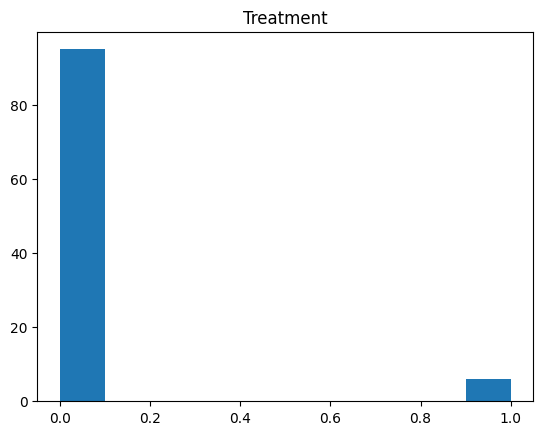

In [ ]:
plt.hist(df['Treatment'])
plt.title('Treatment')
plt.show()

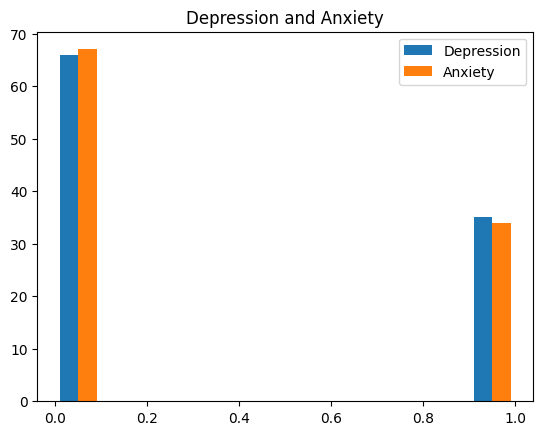

In [ ]:
plt.hist(df[['Depression','Anxiety']],label=("Depression",'Anxiety'))
plt.title('Depression and Anxiety')
plt.legend(loc="upper right")
plt.show()

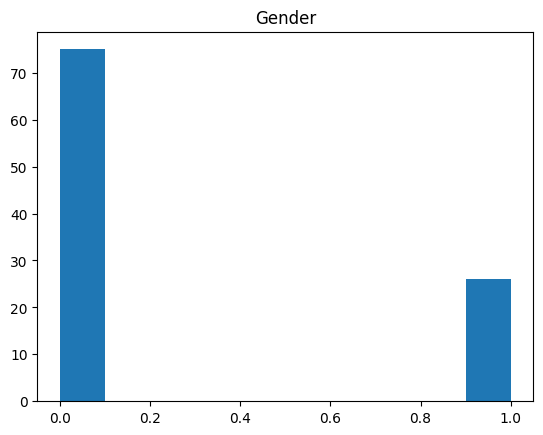

In [ ]:
plt.hist(df['Gender'])
plt.title('Gender')
plt.show()

Treatment
0    [[Axes(0.125,0.722857;0.215278x0.157143), Axes...
1    [[Axes(0.125,0.722857;0.215278x0.157143), Axes...
dtype: object

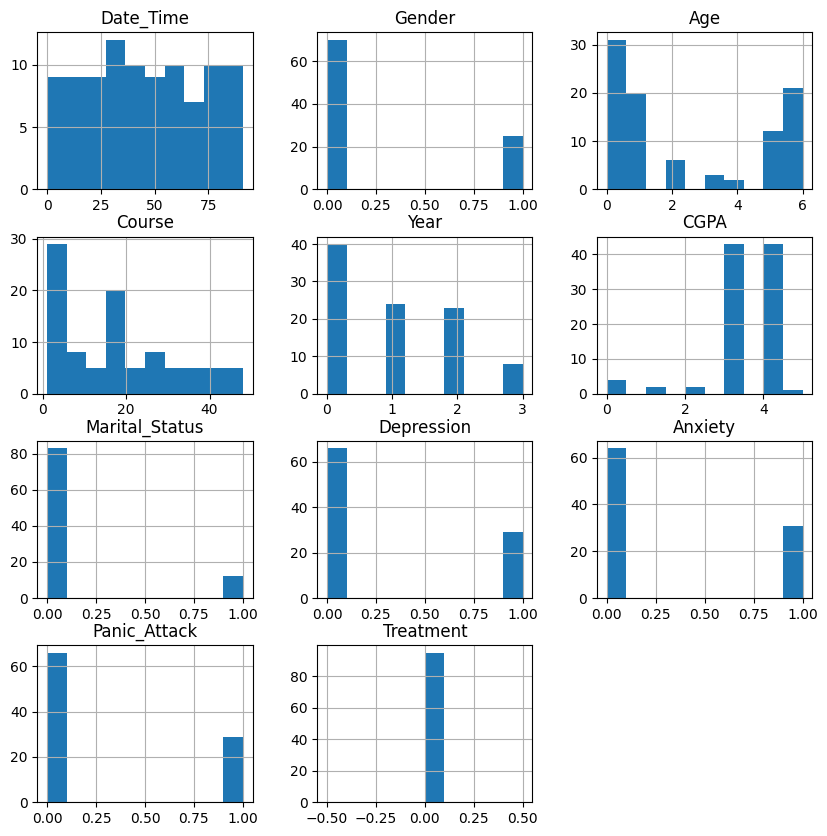

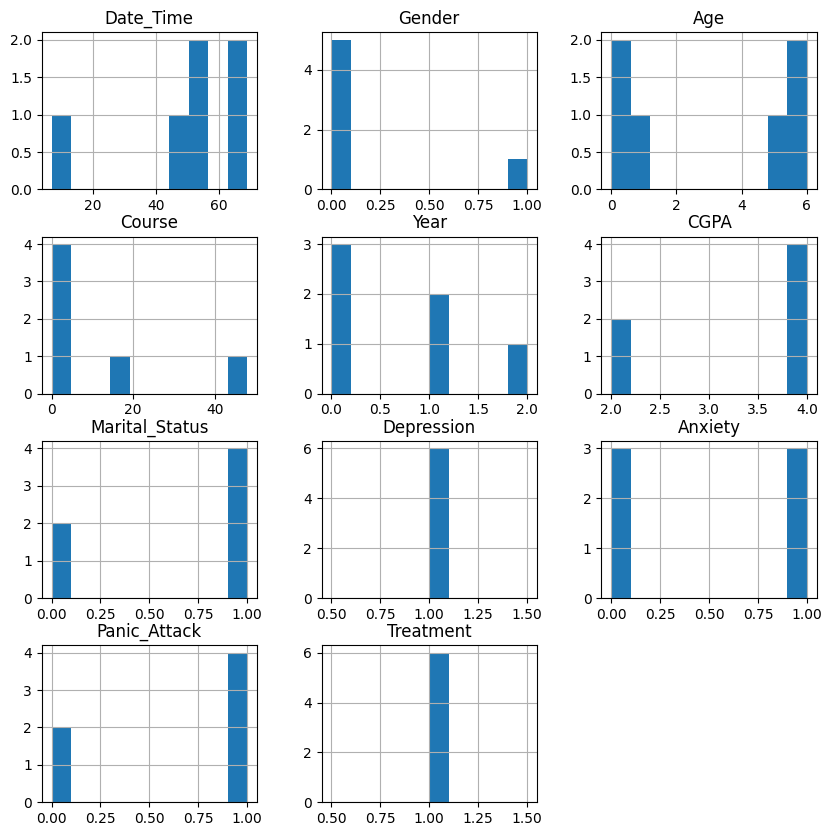

In [ ]:
df.groupby('Treatment').hist(figsize=(10, 10))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

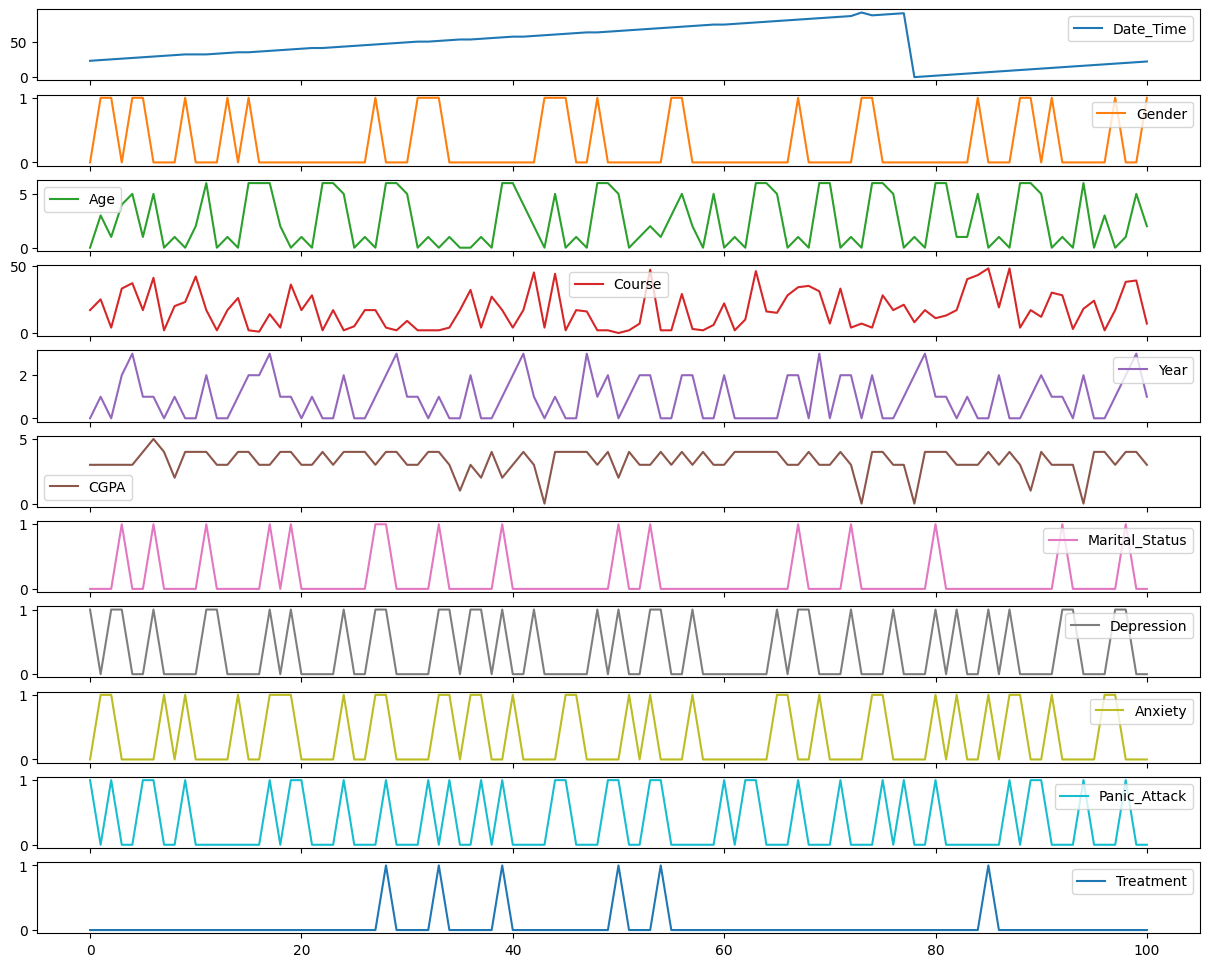

In [ ]:
df.plot(subplots=True, figsize=(15, 12))

# **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
X = df.drop('Treatment', axis= 1)
y = df['Treatment']

In [ ]:
os=RandomOverSampler(random_state=42)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [ ]:
X_train_os,Y_train_os=os.fit_resample(X_train,Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_os)))

The number of classes before fit Counter({0: 75, 1: 5})
The number of classes after fit Counter({0: 75, 1: 75})


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=None)

In [ ]:
class_counts = Counter(np.squeeze(y))

In [ ]:
class_counts

Counter({0: 95, 1: 6})

**Normal BaggingClassifier and XGBClassifier**

In [ ]:
import xgboost as xgb
model1=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model1.fit(X_train_os, Y_train_os)
model1.score(X_test,Y_test)

0.9523809523809523

In [ ]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train_os, Y_train_os)
model.score(X_test,Y_test)

0.9523809523809523

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracies = cross_val_score(estimator = model1, X = X_train_os, y = Y_train_os, cv = 10)

In [ ]:
accuracies.mean()

0.9333333333333333

In [ ]:
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV

In [ ]:
params_XG = {
    'n_estimators': (10, 100),
    'max_depth': (3, 10),
    'learning_rate': (0.01, 1),
    'min_child_weight': (1, 10),
    'subsample': (0.1, 1),
    'colsample_bytree': (0.1, 1),
    'gamma': (0, 10)
}

In [ ]:
nia_search = NatureInspiredSearchCV(
    model1,
    params_XG,
    cv=5,
    verbose=1,
    algorithm='hba',
    population_size=500,
    max_n_gen=20,
    max_stagnating_gen=100,    
    runs=10,
    scoring='f1_macro',
    random_state=42,
)

nia_search.fit(X_train_os, Y_train_os)

Fitting 5 folds for some of the 128 candidates, which might total in 640 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candida

NatureInspiredSearchCV(cv=5,
                       estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               gpu_id=None, grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_...
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               predictor=None, random_state=1, ...),
                       max_n_gen=20, max_stagnating_gen=100,
                       param_grid={'colsample_bytree': (0.1, 1),
                                   'gamma': (0, 10), 'learning_rate': (0.01, 1),
                                   'max_depth': (3, 10),
                                   'min_child_weight': (1, 10),
                                   'n_estimators': (10, 100),
                                   'subsample': (0.1, 1)},
                       population_size=500, random_state=42, runs=10,
                       scoring='f1_macro', verbose=1)

In [ ]:
C = nia_search.best_params_

In [ ]:
from sklearn.metrics import classification_report
model1=xgb.XGBClassifier(random_state=42,**C)

model1.fit(X_train_os, Y_train_os)

y_pred = model1.predict(X_test)

print(classification_report(Y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9524    1.0000    0.9756        20
           1     0.0000    0.0000    0.0000         1

    accuracy                         0.9524        21
   macro avg     0.4762    0.5000    0.4878        21
weighted avg     0.9070    0.9524    0.9292        21



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: xlabel='generation', ylabel='score'>

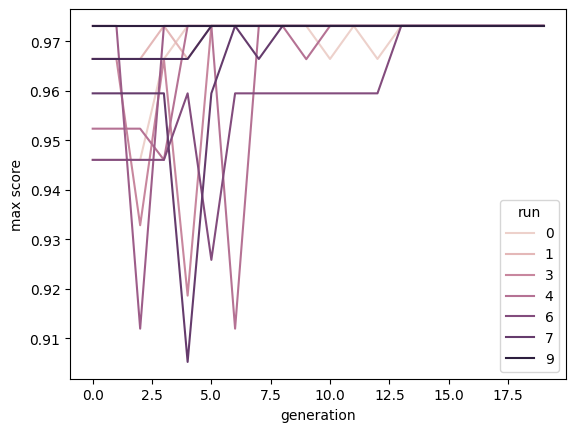

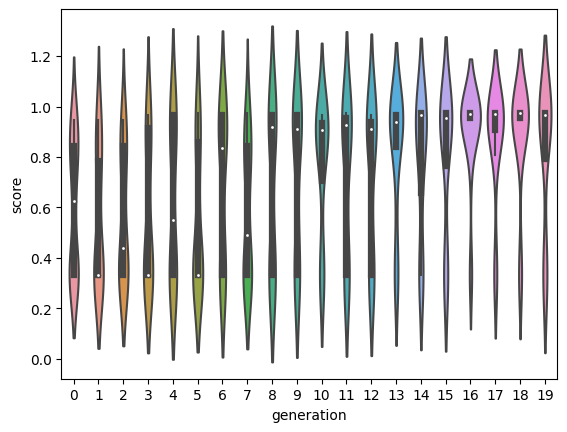

In [ ]:
from sklearn_nature_inspired_algorithms.helpers import score_by_generation_lineplot
from sklearn_nature_inspired_algorithms.helpers import score_by_generation_violinplot

score_by_generation_lineplot(nia_search)
score_by_generation_violinplot(nia_search)

# **Optimization**

**Fitness Function XGBoost**

In [ ]:
params_XG = {
    'n_estimators': (10, 100),
    'max_depth': (3, 10),
    'learning_rate': (0.01, 1),
    'min_child_weight': (1, 10),
    'subsample': (0.1, 1),
    'colsample_bytree': (0.1, 1),
    'gamma': (0, 10)
}

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

def fitness_function_XGboost(x):
    # x[0] = max_depth, x[1] = learning_rate, x[2] = min_child_weight
    
    # Define XGBoost classifier with the hyperparameters
    clf = xgb.XGBClassifier(n_estimators=int(x[0]),max_depth=int(x[1]), learning_rate=x[2], min_child_weight=int(x[3]),
                            subsample =x[4],colsample_bytree=x[5], gamma =x[6], random_state=42)
    
    # Compute cross-validation scores
    scores = cross_val_score(clf, X_train_os, Y_train_os, cv=5)
    
    return scores.mean()

**XGBoost----PSO Algorithm**

In [ ]:
# Define the search space intervals
intervals =  [(10, 100),(1, 10), (0.001, 1.0), (1, 10),(0.1, 1),(0.1, 1),(0, 10)]

# Define the number of particles in the population
population_size = 100

# Define the maximum number of iterations
max_iterations = 10

# Initialize the population
population1 = [[random.uniform(interval[0], interval[1]) for interval in intervals] for _ in range(population_size)]

In [ ]:
# Run the PSO algorithm
global_best_position_XGB, fitnesses_XGB = PSO(population1, fitness_function_XGboost, intervals, max_iterations, c1=2, c2=2)


In [ ]:
print("Global best position:", global_best_position_XGB)

Global best position: [21.362665182669595, 5.9134156341710105, 0.97534395930116, 1, 1, 0.3855497278322091, 0]


In [ ]:
global_best_position_XGB[0] = round(global_best_position_XGB[0])
global_best_position_XGB[1] = round(global_best_position_XGB[1])
global_best_position_XGB

[21, 6, 0.97534395930116, 1, 1, 0.3855497278322091, 0]

In [ ]:
print("Fitness:", fitness_function_XGboost(global_best_position_XGB))

Fitness: 0.9866666666666667


In [ ]:
# create an XGBoost classifier object and set its parameters to the global_best_position
model_XGB = xgb.XGBClassifier(n_estimators= global_best_position_XGB[0],
                              max_depth=global_best_position_XGB[1],
                              learning_rate=global_best_position_XGB[2],
                              min_child_weight=global_best_position_XGB[3],
                              subsample =global_best_position_XGB[4],
                              colsample_bytree=global_best_position_XGB[5],
                              gamma =global_best_position_XGB[6])

# fit the model to your training data and evaluate it on your test data
model_XGB.fit( X_train_os, Y_train_os)
accuracy = model_XGB.score( X_train_os, Y_train_os)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [ ]:
#predict labels for test set
y_test = model_XGB.predict(X_test)

# calculate evaluation metrics
accuracy = metrics.accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(Y_test, y_pred,average='weighted')

# print evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)


Accuracy:  0.9523809523809523
Precision:  0.9070294784580499
Recall:  0.9523809523809523
F1 Score:  0.9291521486643438


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovo')

In [ ]:
from sklearn.metrics import classification_report

y_pred = model_XGB.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.48      0.50      0.49        21
weighted avg       0.91      0.95      0.93        21



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

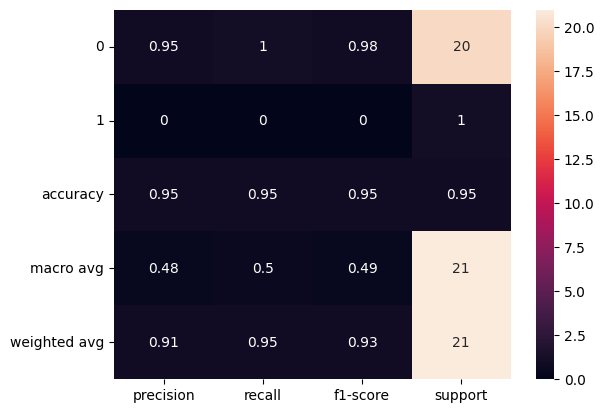

In [ ]:
y_pred = model_XGB.predict(X_test)
report = classification_report(Y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).transpose(), annot=True)



**XGBoost----Firefly Algorithm**

In [ ]:
# Run the firefly algorithm to find the optimal solution
best_solution_XGB, best_fitness_XGB = firefly_algorithm(population1, fitness_function_XGboost, intervals, 
                                                max_iterations, alpha=0.2, beta=1, gamma=1)


In [ ]:
# Print the results
print("Best solution: ", best_solution_XGB)
print("Best fitness: ", best_fitness_XGB)

Best solution:  [76.94995179088248, 4.904950102624998, 0.4351168780137197, 1.487559539643844, 1, 0.8028979594969363, 1.3895910399812885]
Best fitness:  0.9733333333333334


In [ ]:
best_solution_XGB[0] = round(best_solution_XGB[0])
best_solution_XGB[1] = round(best_solution_XGB[1])

In [ ]:
best_solution_XGB

[77,
 5,
 0.4351168780137197,
 1.487559539643844,
 1,
 0.8028979594969363,
 1.3895910399812885]

In [ ]:
# create an XGBoost classifier object and set its parameters to the global_best_position
model_XGB_F = xgb.XGBClassifier(n_estimators= best_solution_XGB[0],
                              max_depth=best_solution_XGB[1],
                              learning_rate=best_solution_XGB[2],
                              min_child_weight=best_solution_XGB[3],
                              subsample =best_solution_XGB[4],
                              colsample_bytree=best_solution_XGB[5],
                              gamma =best_solution_XGB[6])

# fit the model to your training data and evaluate it on your test data
model_XGB_F.fit(X_train_os, Y_train_os)
accuracy = model_XGB_F.score(X_train_os, Y_train_os)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.67%


In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [ ]:
# predict labels for test set
y_test = model_XGB_F.predict(X_test)

# calculate evaluation metrics
accuracy = metrics.accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(Y_test, y_pred,average='weighted')

# print evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)


Accuracy:  0.9523809523809523
Precision:  0.9070294784580499
Recall:  0.9523809523809523
F1 Score:  0.9291521486643438


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [ ]:
len(df)

101

In [ ]:
data = df

In [ ]:
X = data.drop('Treatment', axis=1)
X = StandardScaler().fit_transform(X)

In [ ]:
len(X)

101

In [ ]:
km = KMeans(n_clusters=2)
km_pred = km.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


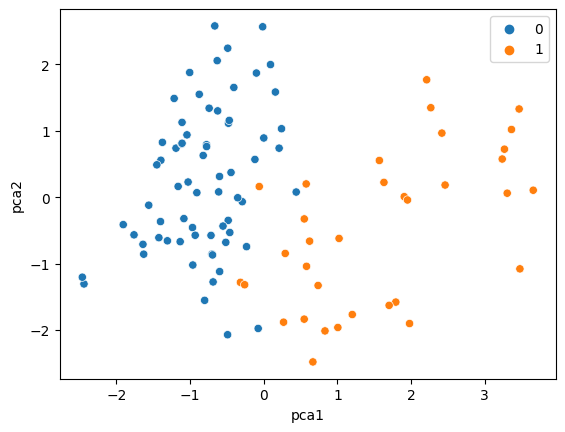

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=km_pred, data=results)
plt.show()